<a href="https://colab.research.google.com/github/avyay10/DiscordNetworkAnalysis/blob/main/SIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scipy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [ ]:
!pip install 'networkx<2.7' 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
def get_data(filename):
    # use a context manager to load in the data
    with open(filename, 'r', encoding='utf8') as rf:
        # transform file into string and split along new line
        lines = rf.read().split("\n")

        # separate each line along the tab characters
        data = [line.split("\t") for line in lines]

        # grab the header
        header = data[0]

        # delete header from data
        data = data[1:]
    
    # return header and data
    return header, data

In [ ]:
# load data in from file
node_header, node_data = get_data('nodes.tsv')
edge_header, edge_data = get_data('edges.tsv')

In [ ]:
# create graph object
G = nx.DiGraph()

# add node information to the graph
for node in node_data:
    # add nodes one by one, with id, name, chinese name, and index year
    G.add_node(int(node[1]), name=node[0])#, cname=node[2], indexyear=int(node[3]))

# add edge information to the graph
for edge in edge_data:
    # add edge one by one, node 1, node 2, kin, and label
    G.add_edge(int(edge[0]), int(edge[1]), label=edge[2])

# metrics
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

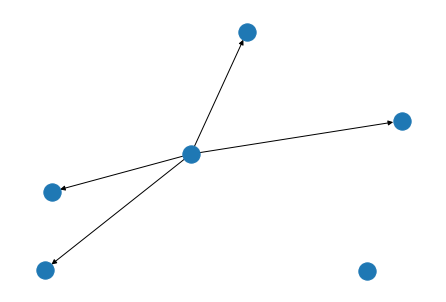

In [ ]:
# visualize this
nx.draw_spring(G)
plt.show()

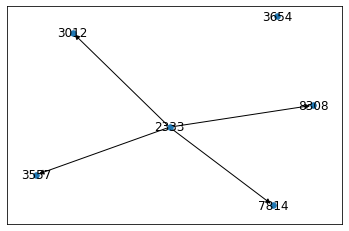

In [ ]:
nx.draw_networkx(G,with_labels = True, node_size = 30)
plt.show()

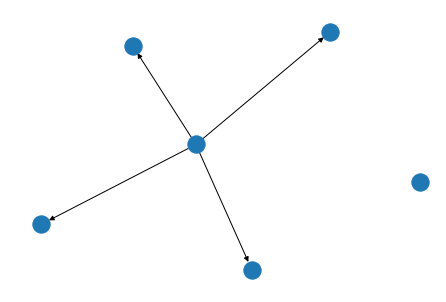

In [ ]:
# visualize this
nx.draw(G)
plt.show()

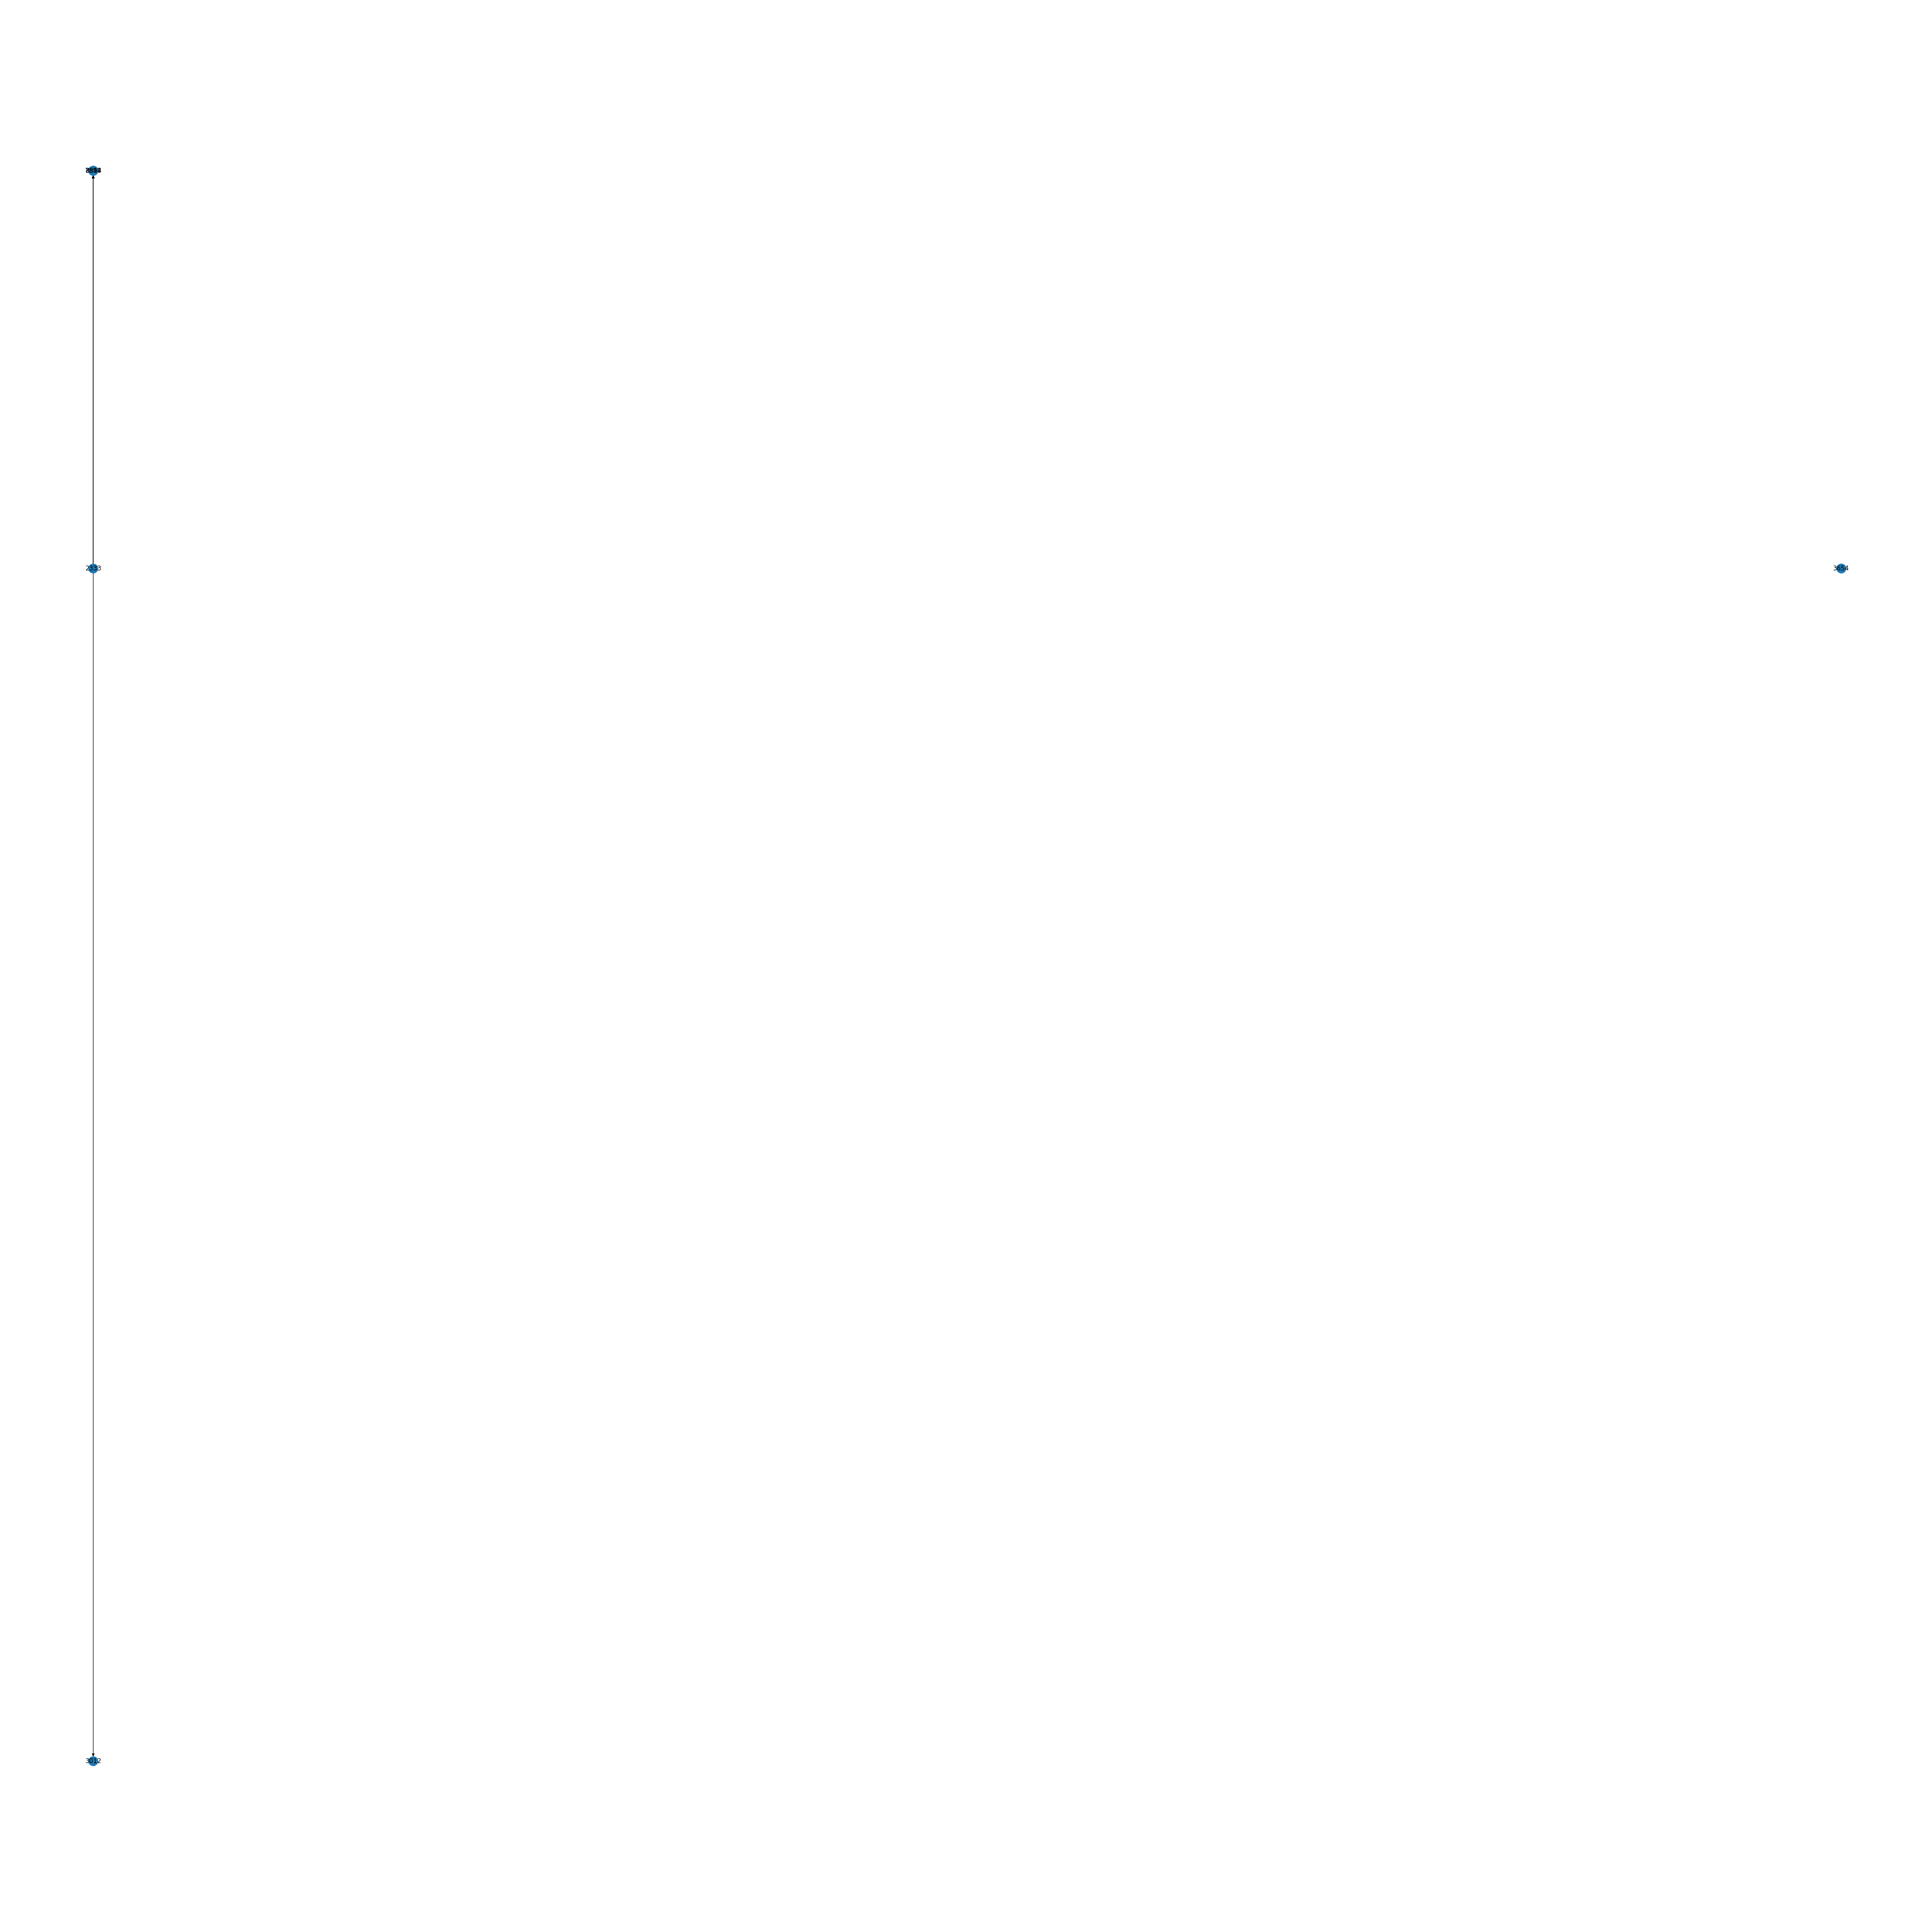

In [ ]:
fig = plt.figure(figsize=(50,50))
pos = nx.spectral_layout(G)
nx.draw(G, pos=pos, with_labels=True) 

plt.show()